#### Exploratory Data Analysis (EDA) and Business Insights

In [1]:
#Import necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
customer=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Zeotap\Customers.csv')
product=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Zeotap\Products.csv')
transaction=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Zeotap\Transactions.csv')

In [3]:
customer.head(10),product.head(10),transaction.head(10)

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15
 5      C0006     Brittany Palmer  South America  2024-01-07
 6      C0007         Paul Graves           Asia  2022-06-18
 7      C0008            David Li  North America  2024-01-13
 8      C0009           Joy Clark         Europe  2023-08-14
 9      C0010           Aaron Cox         Europe  2022-12-15,
   ProductID                  ProductName     Category   Price
 0      P001         ActiveWear Biography        Books  169.30
 1      P002        ActiveWear Smartwatch  Electronics  346.30
 2      P003      ComfortLiving Biography        Books   44.12
 3      P004                BookWorld Rug   Home Decor   95.69
 4      P005 

In [4]:
print("Customer Data Overview:")
customer.head(10)

Customer Data Overview:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [5]:
print("Product Data Overview:")
product.head(10)

Product Data Overview:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [6]:
print("Transaction Data Overview:")
transaction.head(10)

Transaction Data Overview:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [7]:
customer.info(),product.info(),transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(None, None, None)

In [8]:
customer.duplicated().any(),product.duplicated().any(),transaction.duplicated().any()

## no duplicated values

(False, False, False)

In [9]:
customer.isnull().any().sum(),  product.isnull().any().sum(),    transaction.isnull().any().sum()

## no null values

(0, 0, 0)

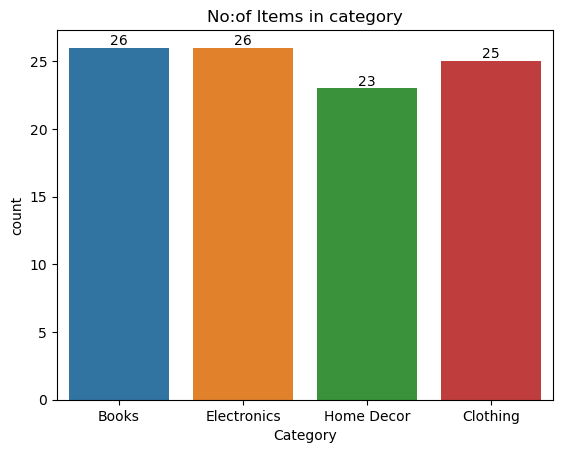

In [10]:
ax=sns.countplot(x='Category', data=product)
ax.bar_label(ax.containers[0])
plt.title("No:of Items in category")
plt.show()


## most of the products are from the category Books and electronics followed by clothing, Home Decor

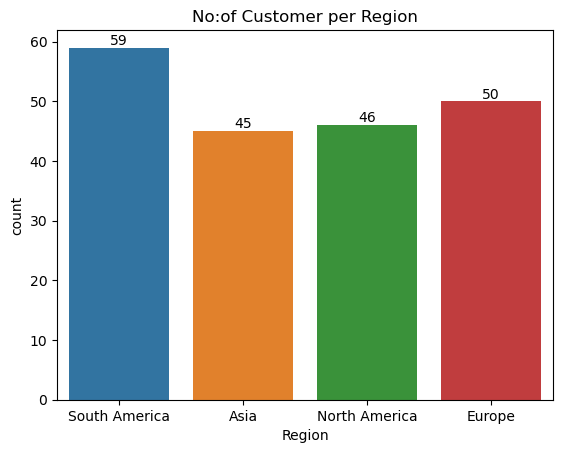

In [11]:
ax=sns.countplot(x='Region', data=customer)
ax.bar_label(ax.containers[0])
plt.title("No:of Customer per Region")
plt.show()

## most of the customers are from the region south america

In [12]:
# Merge datasets for analysis
data = transaction.merge(product, on="ProductID", how="left")
data = data.merge(customer, on="CustomerID", how="left")
data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86,Joshua Hamilton,Asia,2024-11-11


In [13]:
## converting to std datetime format

data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
data["SignupDate"] = pd.to_datetime(data["SignupDate"], errors='coerce')

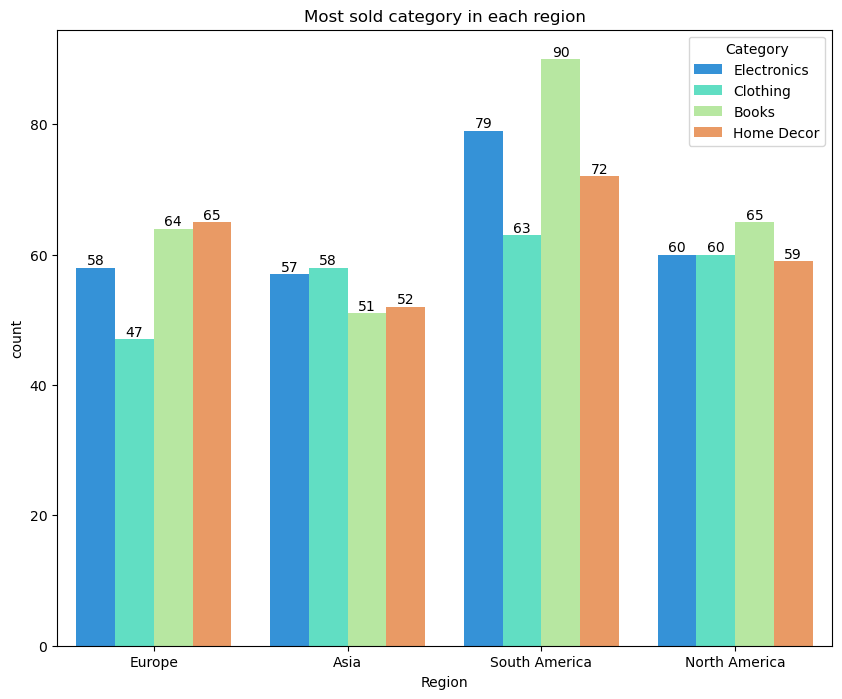

In [14]:
plt.figure(figsize=(10, 8))
ax=sns.countplot(x="Region", hue = "Category", data =data, palette="rainbow")

for container in ax.containers:
    ax.bar_label(container)

plt.title("Most sold category in each region")
plt.show()

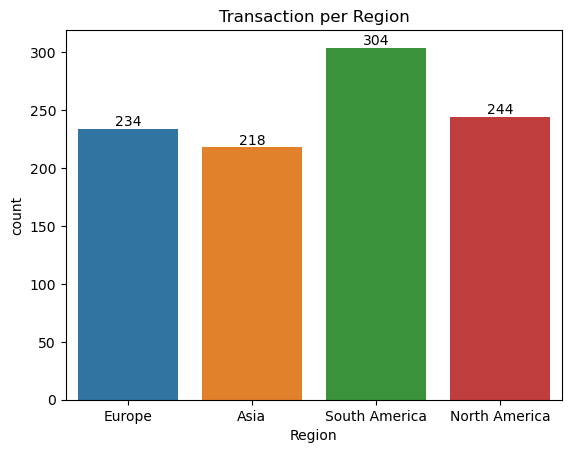

In [15]:
ax=sns.countplot(x='Region', data=data)
ax.bar_label(ax.containers[0])
plt.title("Transaction per Region")
plt.show()


## most of the transaction is from south america

<Figure size 1000x800 with 0 Axes>

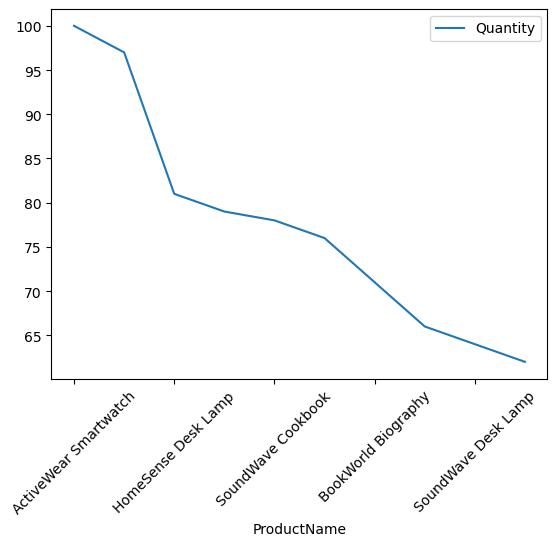

In [16]:
## most selled Products by its quantity
plt.figure(figsize=(10, 8))
df=data.groupby('ProductName')['Quantity'].sum()
df=pd.DataFrame(df.nlargest(10))

df.plot()
plt.xticks(rotation=45)
plt.show()

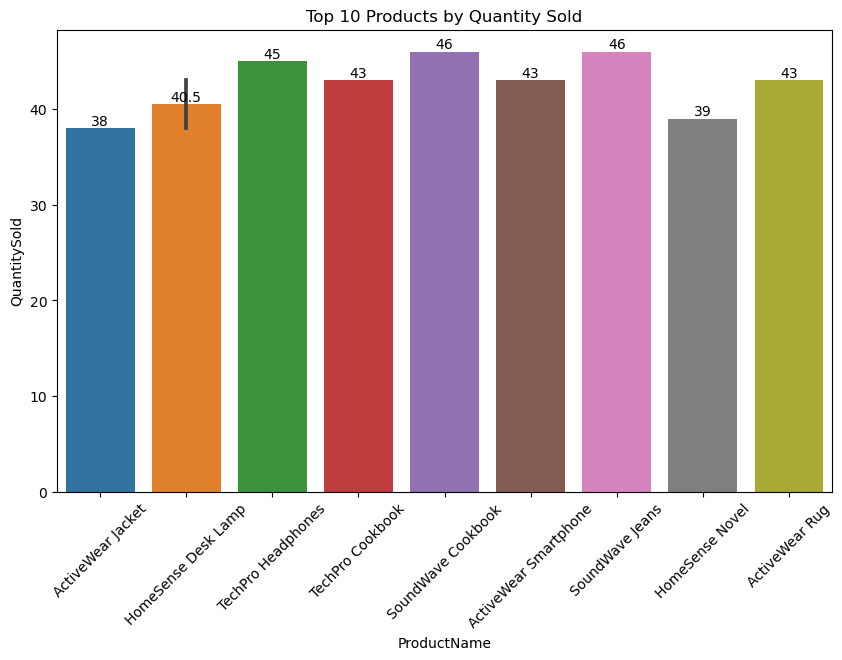

In [17]:
product_sales = transaction.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
top_product_ids = product_sales.head(10).index
top_products = product[product['ProductID'].isin(top_product_ids)]

top_products['QuantitySold'] = top_products['ProductID'].map(product_sales)

# Plotting the top products by quantity sold
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='ProductName', y='QuantitySold', data=top_products)
ax.bar_label(ax.containers[0])
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.show()

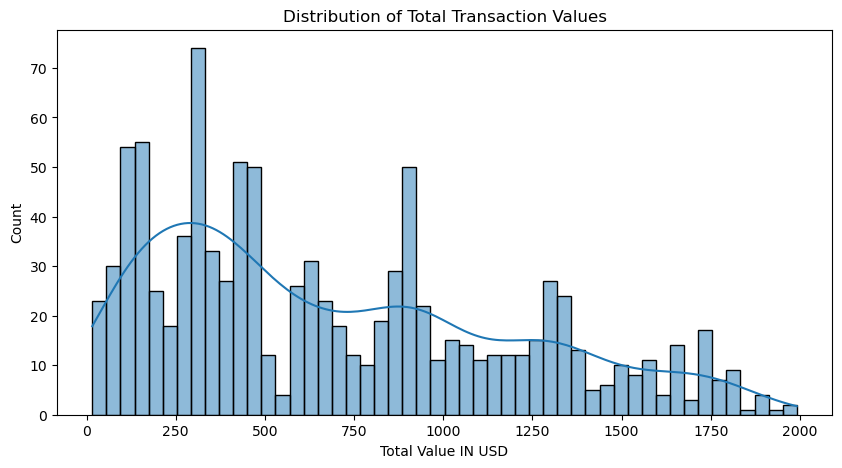

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data["TotalValue"], bins=50, kde=True)
plt.title("Distribution of Total Transaction Values")
plt.xlabel("Total Value IN USD")
plt.show()

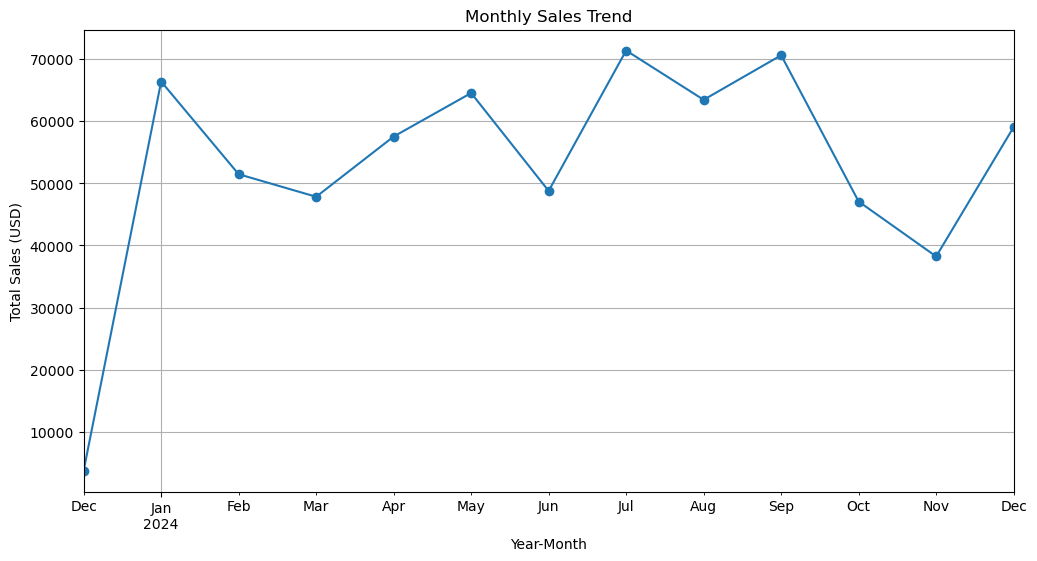

In [19]:
data["YearMonth"] = data["TransactionDate"].dt.to_period("M")
sales_month = data.groupby("YearMonth")["TotalValue"].sum()
plt.figure(figsize=(12, 6))
sales_month.plot(marker="o", linestyle="-")
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()

##### EDA COMPLETED